## Intersecting 2D Parametric Lines

The following is important in its own right. However, it is also a solid lead up to understanding ray-triangle intersection.  

The goal here is to develop an intuition for parametric forms and then the geometry/algebra that answers questions such as "Do these to bounded line segments intersect"

Ross Beveridge,  September 14, 2017

In [73]:
%display latex

To start, simply consider two bounded line segments between start and end points. 
This is also a good time to consider that two segments may well not intersect.

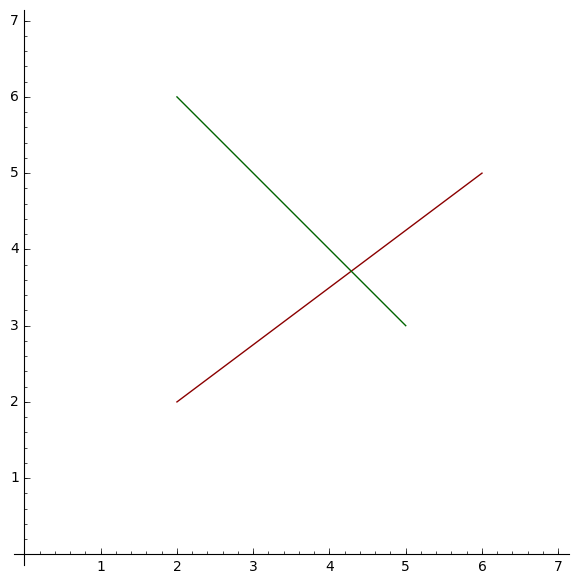

In [74]:
A1 = [2, 2]; A2 = [6, 5]
B1 = [2, 6]; B2 = [5, 3]
LA = line([A1,A2], color="darkred")
LB = line([B1,B2], color="darkgreen")
bnd = 7
show(LA + LB, xmin=0, ymin=0, xmax=bnd, ymax=bnd, aspect_ratio=1)

### Surface the Parametric Form

The following is arguably awkward. However, it also makes very very explicit the way in which the x and y values along the parametric line are defined and treated as a function on the parameter t.  So, while the resulting figure is identical to that above, pay attention to how very different (and complex) the code is that produces the graphics. And, as we are about to see, this will open up some options for alternative ways to think about and plot these 'lines'.

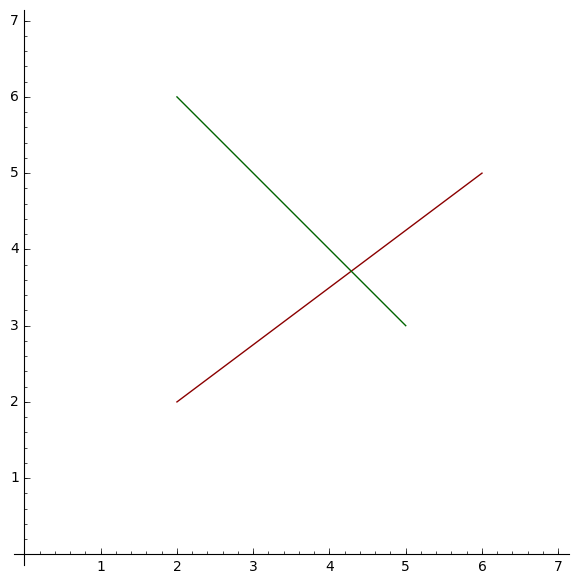

In [75]:
t = var('t')
def lapx(t) : return (A1[0]+(A2[0]-A1[0])*t)
def lapy(t) : return (A1[1]+(A2[1]-A1[1])*t)
def lbpx(t) : return (B1[0]+(B2[0]-B1[0])*t)
def lbpy(t) : return (B1[1]+(B2[1]-B1[1])*t)
LAP = parametric_plot((lapx(t),lapy(t)),(t,0.0,1.0),color='darkred')
LBP = parametric_plot((lbpx(t),lbpy(t)),(t,0.0,1.0),color='darkgreen')
bnd = 7
show(LAP + LBP, xmin=0, ymin=0, xmax=bnd, ymax=bnd, aspect_ratio=1)

### A Line is not a Bounded Line Segment

Terminology gets confusing quickly.  I and almost everyone involved in graphics will use the word 'line' in an ambiguous manner.  Everyone familiar with K-12 geometry knows that lines go on without end. However, you were not concerned (probably) that above I described my code as drawing lines.  In CS410 I will try at times to be more clear. A bounded line segment, or line segment for short, has a starting and end point.  A line goes on without bound.

To illustrate we can put together the elements of the first and second plots and use a much broader range of t-values to essentially draw the infinite lines. 

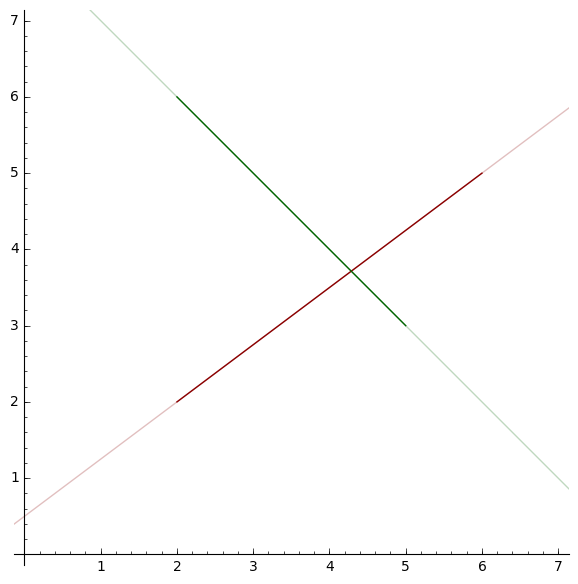

In [76]:
LA = line([A1,A2], color="darkred")
LB = line([B1,B2], color="darkgreen")
LAP = parametric_plot((lapx(t),lapy(t)),(t,-10.0,10.0),color='darkred', alpha=0.25)
LBP = parametric_plot((lbpx(t),lbpy(t)),(t,-10.0,10.0),color='darkgreen', alpha=0.25)
bnd = 7
show(LA + LB + LAP + LBP, xmin=0, ymin=0, xmax=bnd, ymax=bnd, aspect_ratio=1)

### Same But Different, Think About Enumerating Points

A different way to think about a parametric form is relative to discrete sampling in the parameter t.  So, here are the two lines viewed as k points.

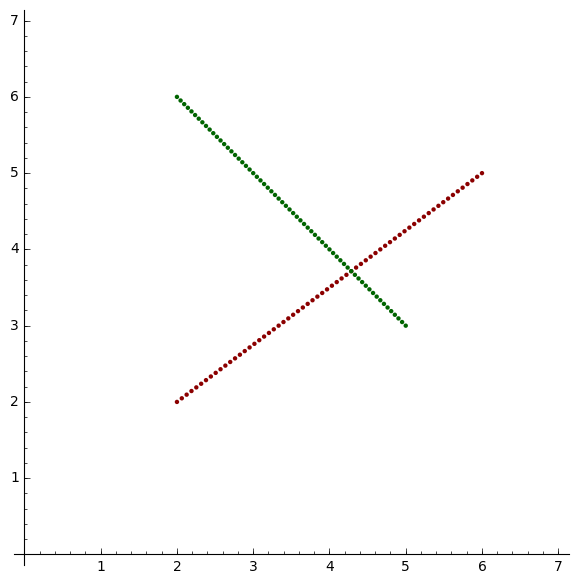

In [77]:
k  = 64.0
A1v = vector(A1); A2v = vector(A2);
B1v = vector(B1); B2v = vector(B2);
tss = [i/(k-1) for i in range(k)] 
ptsa = [A1v + (A2v - A1v) * t for t in tss]
ptsb = [B1v + (B2v - B1v) * t for t in tss]
gptsa = [point(p,color='darkred') for p in ptsa]
gptsb = [point(p,color='darkgreen') for p in ptsb]
bnd = 7
show(sum(gptsa) + sum(gptsb), xmin=0, ymin=0, xmax=bnd, ymax=bnd, aspect_ratio=1)

### Where do the Lines Intersect

This is a classic two equations in two unkowns problem.   It begins by parameterizing the second line in parameter s rather than t and next asking for which values of s and t the parametric forms are equal.  This is actually better seen in equation form.

In [78]:
var('s, t, ax1, ay1, ax2, ay2, bx1, by1, bx2, by2')
eq1 = ax1 + (ax2 - ax1) * t == bx1 + (bx2 - bx1) * s
eq2 = ay1 + (ay2 - ay1) * t == by1 + (by2 - by1) * s
pretty_print(eq1)
pretty_print(eq2)

-(ax1 - ax2)*t + ax1 == -(bx1 - bx2)*s + bx1

-(ay1 - ay2)*t + ay1 == -(by1 - by2)*s + by1

In [79]:
res = solve([eq1,eq2], s, t)
eq3 = res[0][0]
eq4 = res[0][1]
pretty_print(eq3)
pretty_print(eq4)

s == -(ax2*(ay1 - by1) - ax1*(ay2 - by1) - (ay1 - ay2)*bx1)/((ay1 - ay2)*bx1 - (ay1 - ay2)*bx2 - ax1*(by1 - by2) + ax2*(by1 - by2))

t == ((ay1 - by2)*bx1 - (ay1 - by1)*bx2 - ax1*(by1 - by2))/((ay1 - ay2)*bx1 - (ay1 - ay2)*bx2 - ax1*(by1 - by2) + ax2*(by1 - by2))

Let's test this out with the values for the original pair of lines

In [80]:
ax1  = A1[0]; ax2 = A2[0]; ay1 = A1[1]; ay2 = A2[1]
bx1  = B1[0]; bx2 = B2[0]; by1 = B1[1]; by2 = B2[1]
eq1v = ax1 + (ax2 - ax1) * t == bx1 + (bx2 - bx1) * s 
eq2v = ay1 + (ay2 - ay1) * t == by1 + (by2 - by1) * s
resv = solve([eq1v,eq2v], s, t)
pretty_print(resv[0])

[s == (16/21), t == (4/7)]

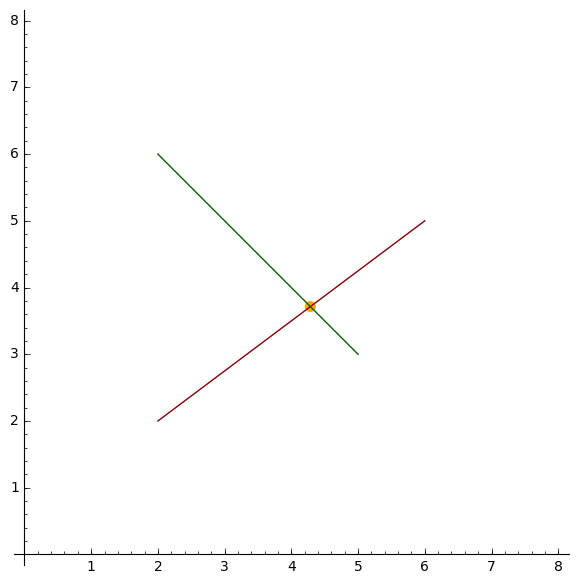

In [81]:
tstar = resv[0][1].rhs()
LA  = line([A1,A2], color="darkred")
LB  = line([B1,B2], color="darkgreen")
poi = point((lapx(tstar), lapy(tstar)),size=64,color='orange')
bnd = 8
show(LA + LB + poi, xmin=0, ymin=0, xmax=bnd, ymax=bnd, aspect_ratio=1)
